# OsuLearn
##### Machine Learning para jogar mapas de osu!

^^^

Isso aí, tô sem mais nada pra fazer, bora criar uma IA que joga osu! )o)

## Importar umas coisas...

In [2]:
# Machine Learning
import tensorflow as tf
import keras

# Dados
import numpy as np
import pandas as pd

# Plotagem
import matplotlib.pyplot as plt

# Utilidades
import os
import re
import math
import glob

from importlib import reload

# Lógica do osu!
import osu.rulesets.beatmap
import osu.rulesets.replay
import osu.rulesets.hitobjects as hitobjects

import osulearn.dataset

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Constantes

Aqui tem uns caminhos para os arquivos que precisamos:

In [3]:
# Pasta do osu!
OSU_FOLDER = "C:\\" + os.path.join("Program Files (x86)", "Jogos", "osu!")

## Dados para treinamento...

In [4]:
data_files = osulearn.dataset.all_files(OSU_FOLDER, verbose=True)
data_files.applymap(os.path.basename)

[=======================================>] C:\Program Files (x86)\Jogos\osu... 



replay  \
0    BzMasked - (K)NoW_NAME - Freesia [Expert] (201...   
1    BzMasked - (K)NoW_NAME - Freesia [Expert] (201...   
2    BzMasked - 3R2 - Bunny Panic!!! [Bunny Extinct...   
3    BzMasked - 55x55 - MRAZ' (feat. Larin) [Insane...   
4    BzMasked - Aimer with chelly (EGOIST) - nineli...   
5    BzMasked - Aiobahn & Yunomi - Makuramoto ni Gh...   
6    BzMasked - Aitsuki Nakuru - Monochrome Butterf...   
7    BzMasked - Aitsuki Nakuru - Monochrome Butterf...   
8    BzMasked - Aitsuki Nakuru - Presenter [Noel] (...   
9    BzMasked - Alex Gaudino feat. Crystal Waters -...   
10   BzMasked - Alex Gaudino feat. Crystal Waters -...   
11   BzMasked - Amidst - Phantasy [NYA!] (2018-12-3...   
12   BzMasked - Analogfish - Speed [schoolboy's Ext...   
13   BzMasked - Asterisk - Ren-chon no Drum 'n' Bas...   
14   BzMasked - Ata - Euphoria [Juggernaut 285bpm T...   
15   BzMasked - Avenged Sevenfold - Save Me [Nightm...   
16   BzMasked - Ayase Rie - Yuima-ruWorld TVver. [U...   
17   BzMasked - Ayase Rie - Yuima-ruWorld TVver. [U...   
18   BzMasked - Ayumi. - Hanagoyomi short version [...   
19   BzMasked - beatMARIO - Night of Knights [The W...   
20   BzMasked - Bora - Shine [Friends] (2018-12-30)...   
21   BzMasked - bradbreeck - Star Vs The Forces Of ...   
22   BzMasked - Camellia - Chirality [Horizon] (201...   
23   BzMasked - Camellia - Exit This Earth's Atomos...   
24   BzMasked - Camellia - Exit This Earth's Atomos...   
25   BzMasked - Camellia - Exit This Earth's Atomos...   
26   BzMasked - Camellia - Quantum Entanglement [En...   
27   BzMasked - Caravan Palace - Lone Digger [Funky...   
28   BzMasked - Celldweller - Weaponized [AWM] (201...   
29   BzMasked - Chito (CV Minase Inori), Yuuri (CV ...   
..                                                 ...   
152  BzMasked - The Quick Brown Fox - The Big Black...   
153  BzMasked - Tonight Alive - Little Lion Man [pi...   
154  BzMasked - Triodust - M.R. [Bunny Extinction] ...   
155  BzMasked - TrySail - Honto da yo [Truly] (2018...   
156  BzMasked - TSUNKU - Kumitate Koujou [Ameth's S...   
157  BzMasked - UNDEAD CORPORATION - Yoru Naku Usag...   
158  BzMasked - UNDEAD CORPORATION - Yoru Naku Usag...   
159  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
160  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
161  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
162  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
163  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
164  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
165  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
166  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
167  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
168  BzMasked - Utsu-P - TRAUMATIC [EXTREME] (2018-...   
169  BzMasked - Utsu-P - TRAUMATIC [TRAUMATIZED] (2...   
170  BzMasked - v - AAAAAAAAAAAAAAAAAAAAAAAAAAAAAY ...   
171  BzMasked - Various Artists - Dare demo Ii kara...   
172  BzMasked - xi - ANiMA [Soul] (2019-01-02) Osu.osr   
173  BzMasked - xi - Wish upon Twin Stars [Wish] (2...   
174  BzMasked - Yakushi Ruri - Oniichan, Motto! [Ke...   
175  BzMasked - yes we cant - wh [Banana] (2018-12-...   
176  BzMasked - YooSanHyakurei - Sen no Yukari [A T...   
177  BzMasked - YUI - again [Expert] (2018-12-30) O...   
178  BzMasked - Yui Horie - The World's End [Prolog...   
179  BzMasked - Yunomi - Mentai Cosmic [AmamiyaNath...   
180  BzMasked - Yunomi - Mentai Cosmic [AmamiyaNath...   
181  BzMasked - Zekk - Calling [Iridescent] (2018-0...   

                                               beatmap  
0            (K)NoW_NAME - Freesia (Vert) [Expert].osu  
1            (K)NoW_NAME - Freesia (Vert) [Expert].osu  
2    3R2 - Bunny Panic!!! (Kyubey) [Bunny Extinctio...  
3     55x55 - MRAZ' (feat. Larin) (Venix) [Insane].osu  
4    Aimer with chelly (EGOIST) - ninelie (REDSHiFT...  
5    Aiobahn & Yunomi - Makuramoto ni Ghost (Mentai...  
6    Aitsuki Nakuru - Monochrome Butterfly (Settia).

In [6]:
dataset = osulearn.dataset.load(data_files, verbose=2)

[>.......................................] BzMasked - Aiobahn & Yunomi - Ma... 
	Failed: Not a osu!std replay
[=========>..............................] BzMasked - Galileo Galilei - Ara... 
	Failed: DT and HR are not supported yet
[=======================================>] BzMasked - Zekk - Calling [Iride... 

In [21]:
reload(osulearn.dataset)
reload(osu.rulesets.replay)
reload(osu.rulesets.beatmap)

print()
    
try:
    input_data = pd.read_pickle('.data/input_data.hdf5')
    
except:
    print("Processing Input Data...")
    print("_" * 80)
    print()
    input_data = osulearn.dataset.input_data(dataset, verbose=True)
    input_data.to_pickle('.data/input_data.hdf5')
    print()
    
try:
    target_data = pd.read_pickle('.data/target_data.dat')
except:    
    print("Processing Target Data...")
    print("_" * 80)
    print()
    target_data = osulearn.dataset.target_data(dataset, verbose=True)
    target_data.to_pickle('.data/target_data.dat')
    print()

X = np.reshape(input_data.values, (-1, osulearn.dataset.CHUNK_LENGTH, len(osulearn.dataset.INPUT_FEATURES)))
y = np.reshape(target_data.values, (-1, osulearn.dataset.CHUNK_LENGTH, len(osulearn.dataset.OUTPUT_FEATURES)))
X.shape, y.shape


Processing Input Data...
________________________________________________________________________________

[=======================================>] Calling                             




((448, 2048, 5), (448, 2048, 2))

In [6]:
input_data[['x', 'y']].mean()

x    0.000720
y    0.004761
dtype: float32

In [7]:
target_data[['x', 'y']].mean()

x    0.001011
y    0.001483
dtype: float32

## Modelo de rede neural

Agora começa a festa...

In [11]:
reload(keras)
reload(tf)

from keras.models import Model, Sequential
from keras.layers import    Dense, Dropout, Activation,\
                            CuDNNLSTM, CuDNNGRU, concatenate,\
                            Input, Reshape, Conv1D, UpSampling1D,\
                            GaussianNoise

map_input = Input(shape=X.shape[1:], name='map_info')

lstm = CuDNNLSTM(64, kernel_initializer='normal', return_sequences=True)(map_input)

pos = Dense(64, kernel_initializer='normal', activation='linear')(lstm)
pos = GaussianNoise(0.2)(pos)
pos = Dense(16, kernel_initializer='normal', activation='linear')(pos)
pos = Dense(y.shape[2], kernel_initializer='normal', activation='linear', name='position')(pos)

model = Model(inputs=map_input, outputs=pos)

model.compile(optimizer='adam', loss='mae')
model.summary()

try:
    model.load_weights(".data/model.hdf5")
except Exception as e:
    print()
    print("Failed to load weights: ", e)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
map_info (InputLayer)        (None, 2048, 5)           0         
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 2048, 64)          18176     
_________________________________________________________________
dense_7 (Dense)              (None, 2048, 64)          4160      
_________________________________________________________________
gaussian_noise_4 (GaussianNo (None, 2048, 64)          0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048, 16)          1040      
_________________________________________________________________
position (Dense)             (None, 2048, 2)           34        
Total params: 23,410
Trainable params: 23,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
from random import randint
from sklearn.model_selection import train_test_split

ITERATIONS = 8
EPOCHS = 8

try:
    loss
except NameError:
    loss = []
    
for i in range(ITERATIONS):
    print("-" * 80)
    print("Iteration #%d" % (i + 1))
    print("-" * 80)
    print()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randint(0, 100))
    h = model.fit(X_train, y_train, batch_size=1024, epochs=EPOCHS, verbose=1)
    loss += h.history['loss']
    print()

model.save_weights(".data/model.hdf5")

--------------------------------------------------------------------------------
Iteration #1
--------------------------------------------------------------------------------

Epoch 1/16
313/313 [==============================] - 5s 15ms/step - loss: 0.0568
Epoch 2/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0859
Epoch 3/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 4/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0720
Epoch 5/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 6/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0662
Epoch 7/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0637
Epoch 8/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 9/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0656
Epoch 10/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0662
Epoch 11/16


Epoch 9/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0540
Epoch 10/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 11/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 12/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 13/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 14/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0538
Epoch 15/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0538
Epoch 16/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0538

--------------------------------------------------------------------------------
Iteration #7
--------------------------------------------------------------------------------

Epoch 1/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 2/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 

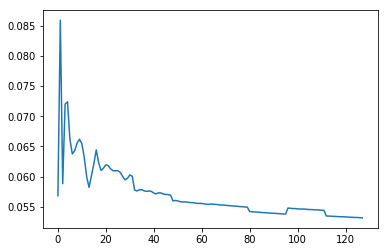

In [17]:
%matplotlib inline

plt.plot(loss)
plt.show()

In [16]:
def plot_info(*compare):
    %matplotlib inline
    
    plt.ylim((-1, 1))
    for data in compare:
        plt.plot([(x, y) for x, y in data])
        plt.show()

0


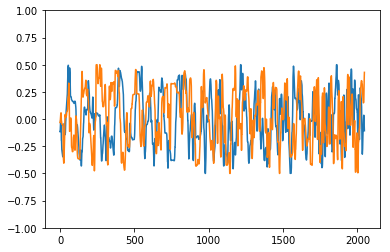

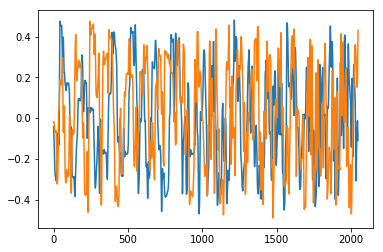

1


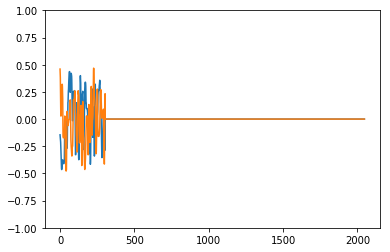

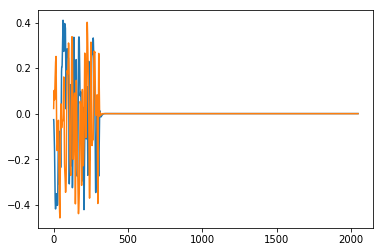

2


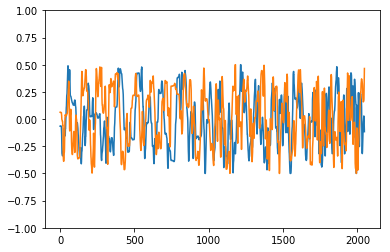

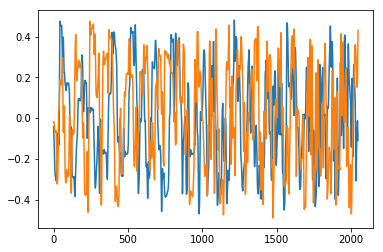

3


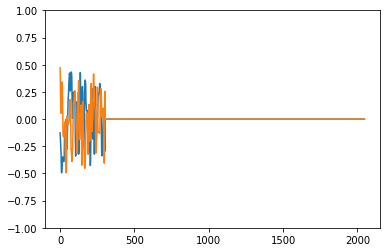

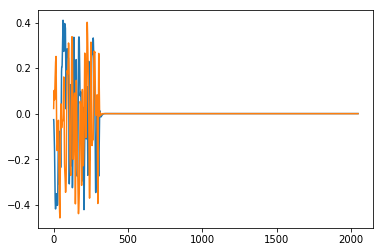

4


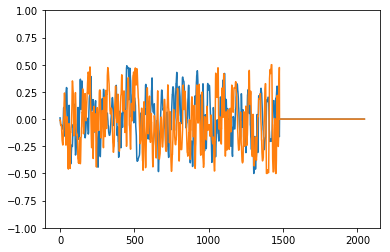

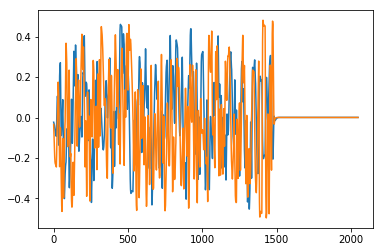

5


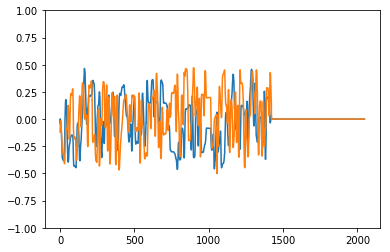

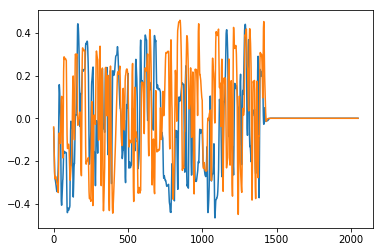

6


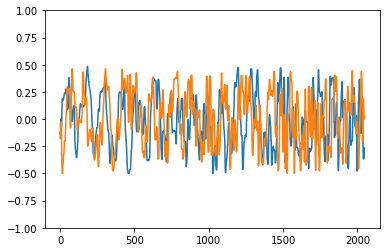

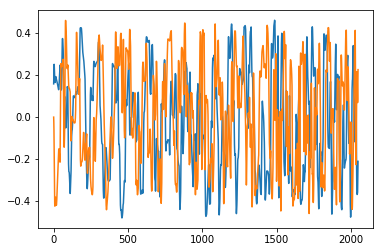

7


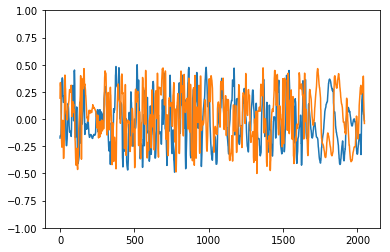

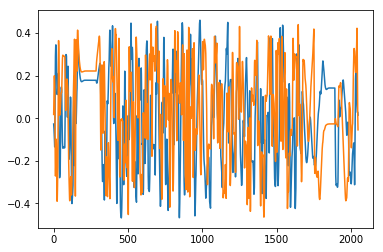

8


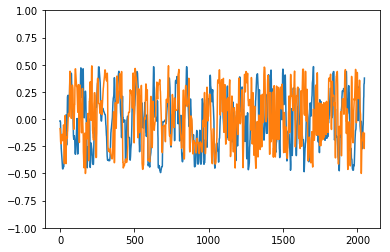

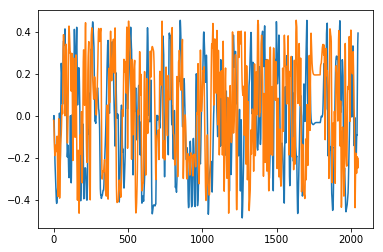

9


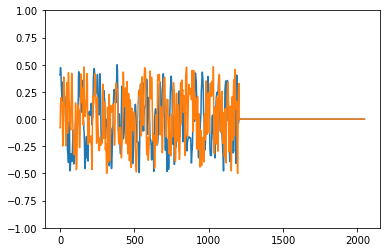

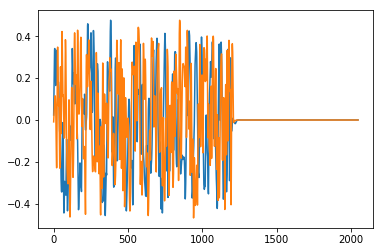

10


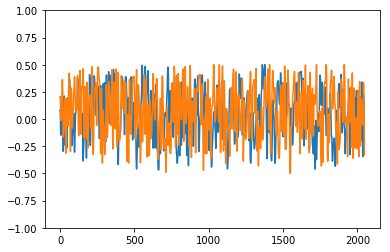

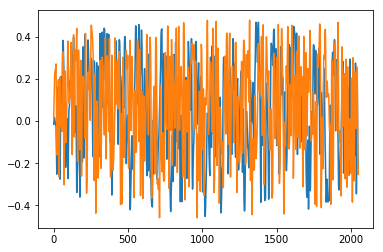

11


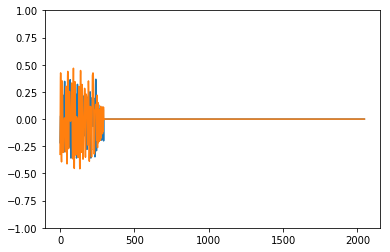

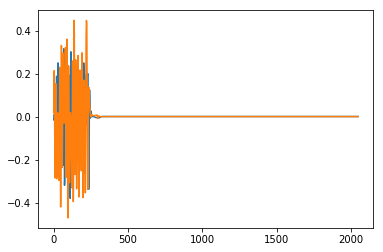

12


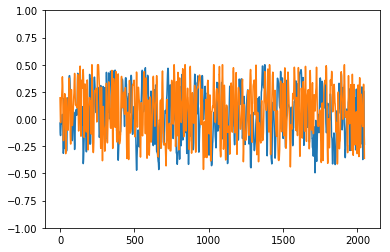

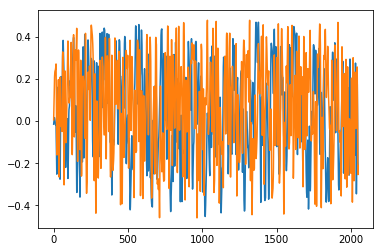

13


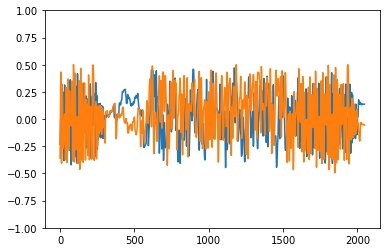

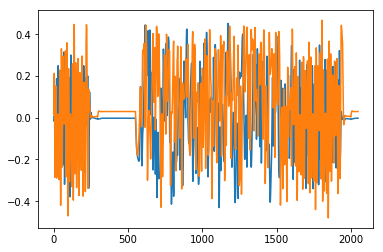

14


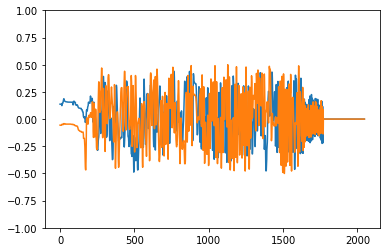

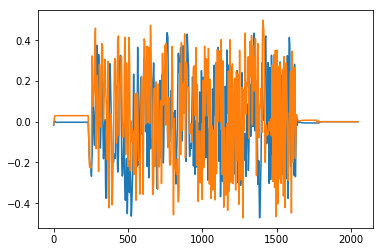

15


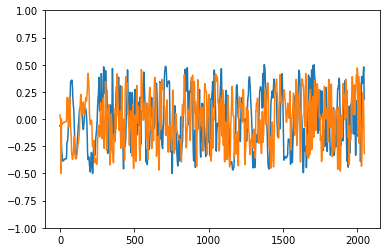

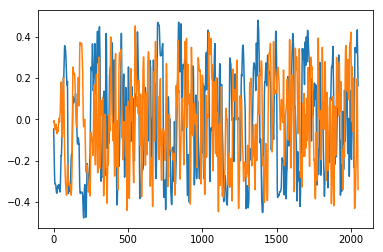

16


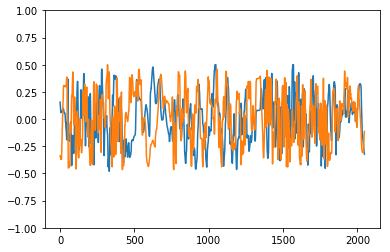

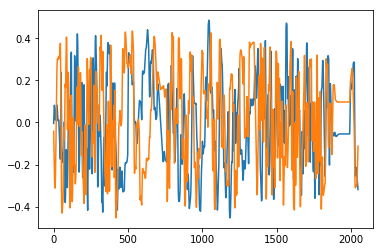

17


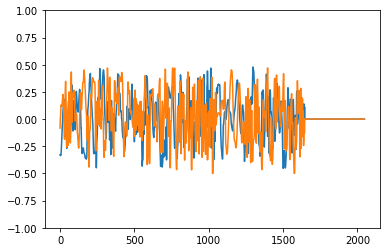

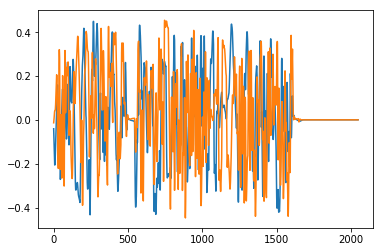

18


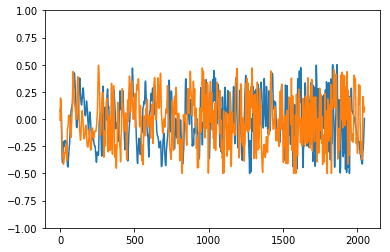

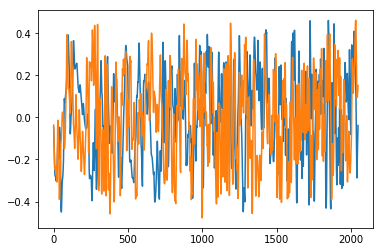

19


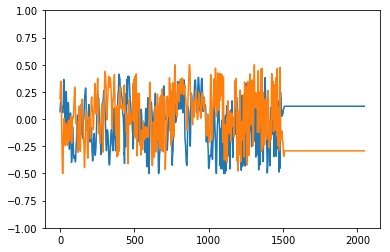

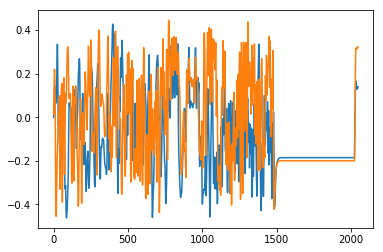

20


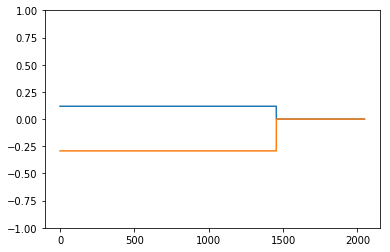

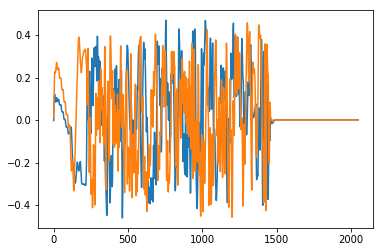

21


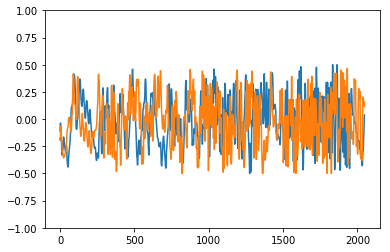

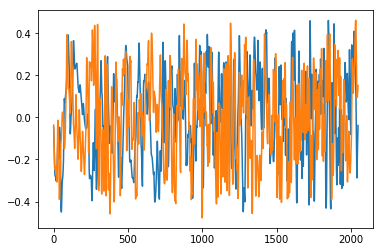

22


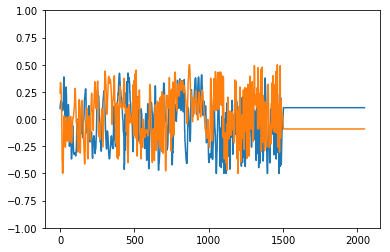

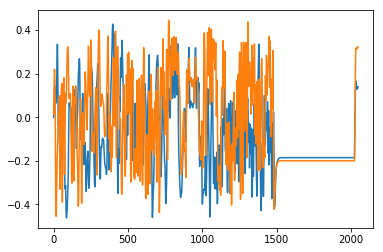

23


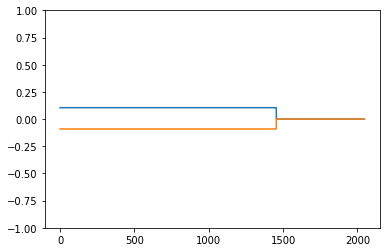

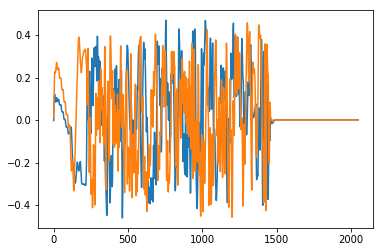

24


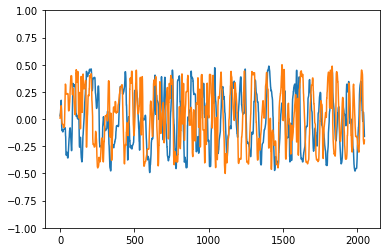

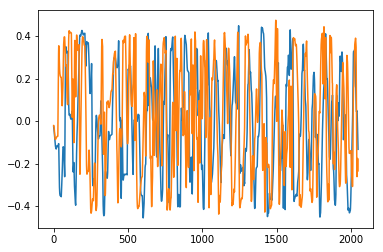

25


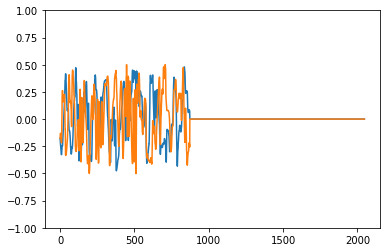

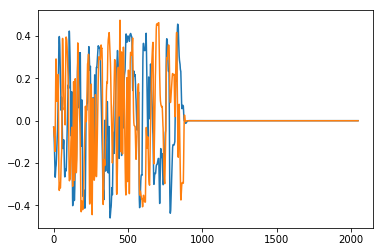

26


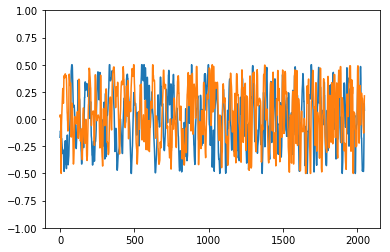

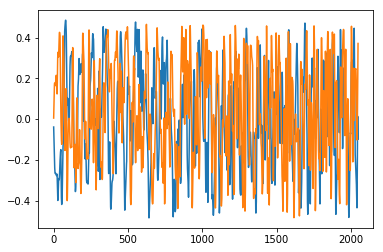

27


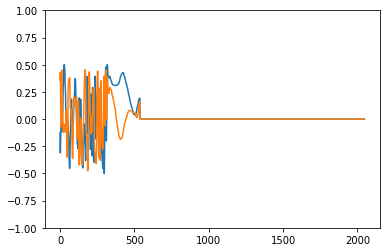

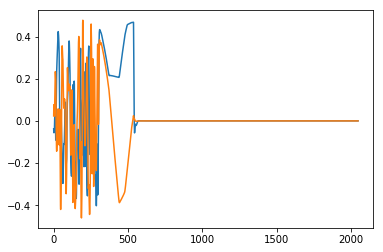

28


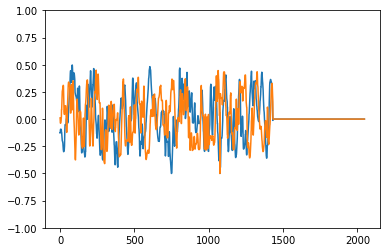

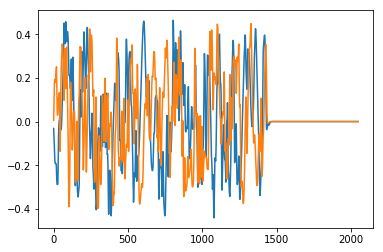

29


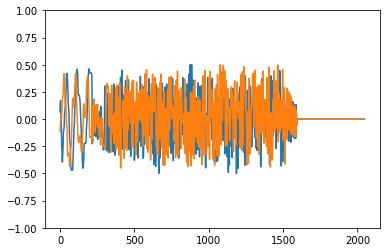

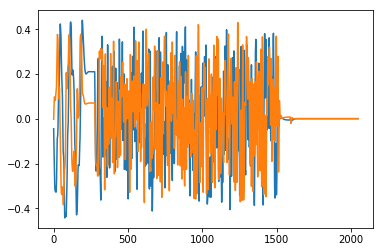

30


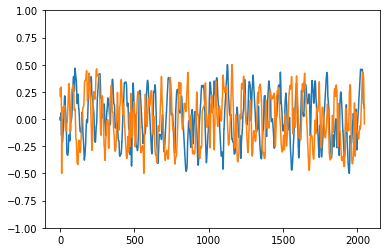

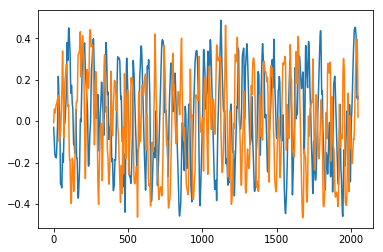

31


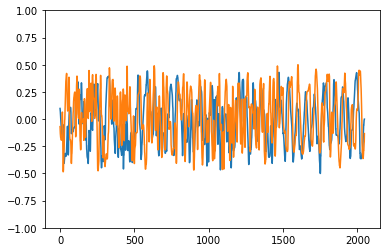

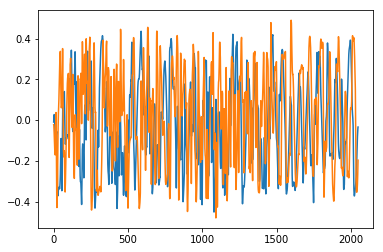

32


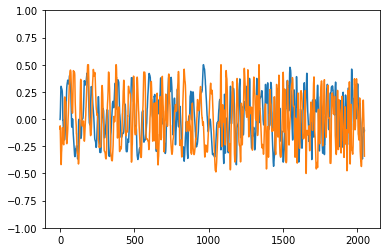

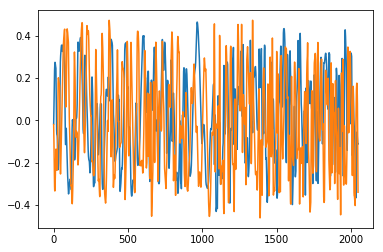

33


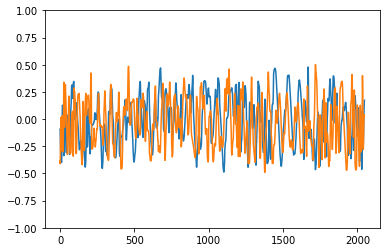

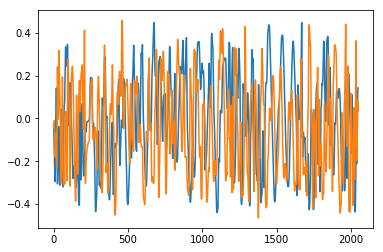

34


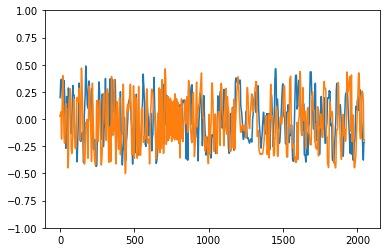

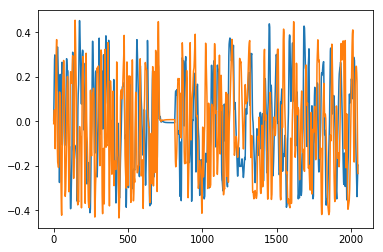

35


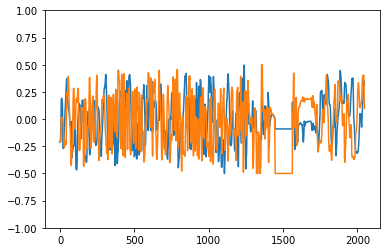

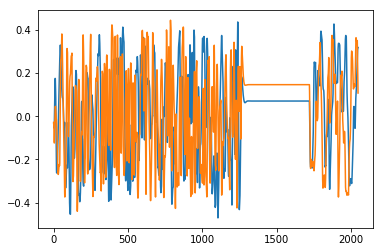

36


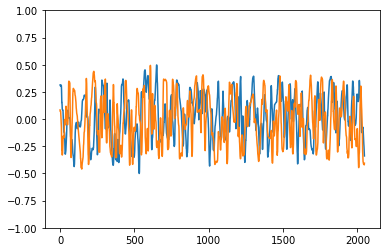

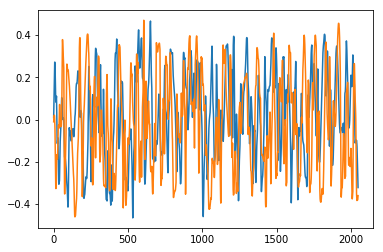

37


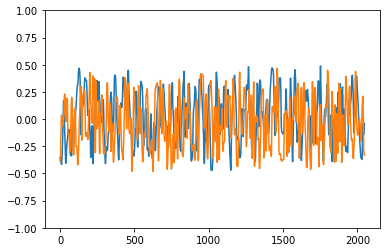

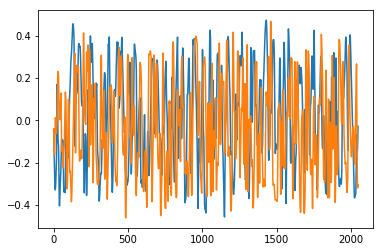

38


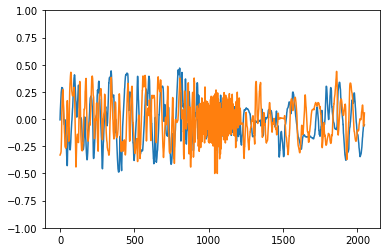

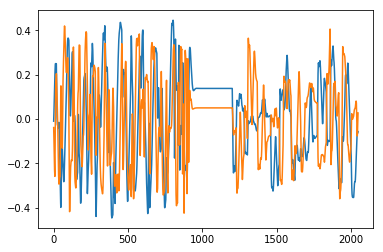

39


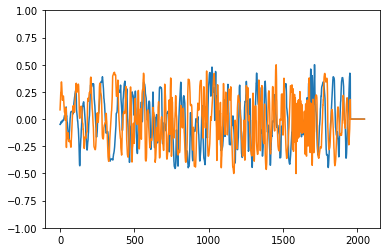

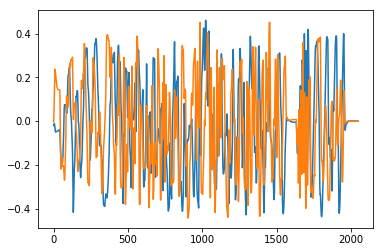

40


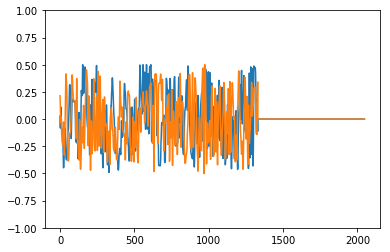

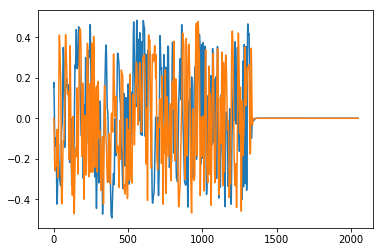

41


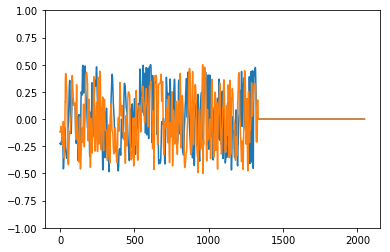

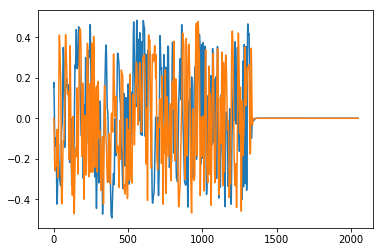

42


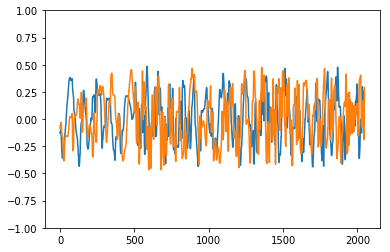

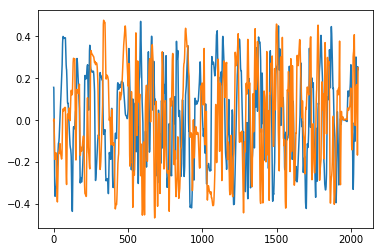

43


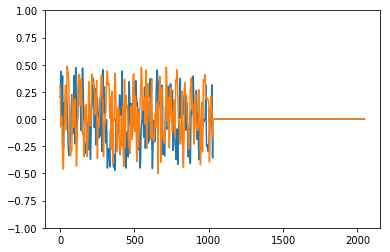

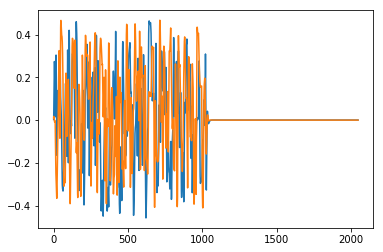

44


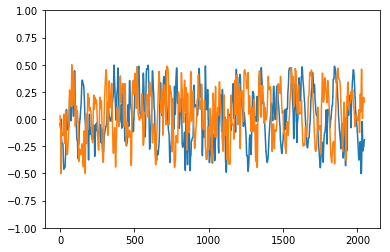

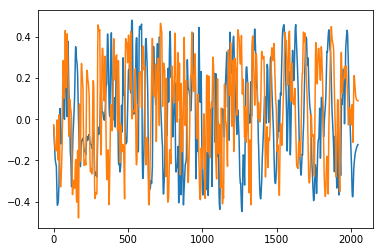

45


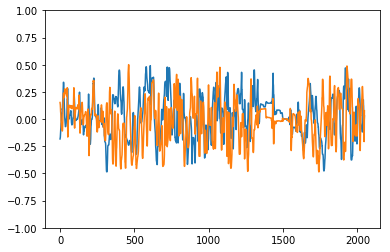

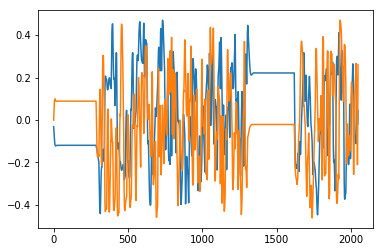

46


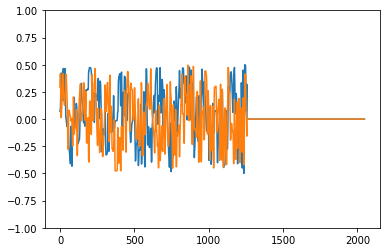

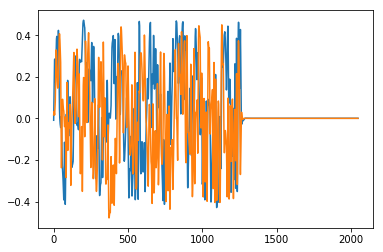

47


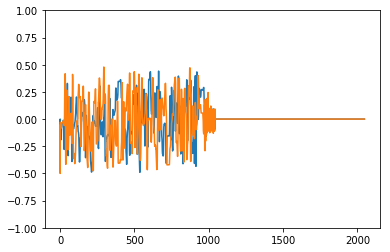

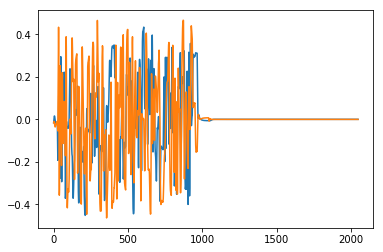

48


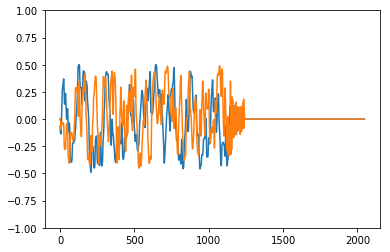

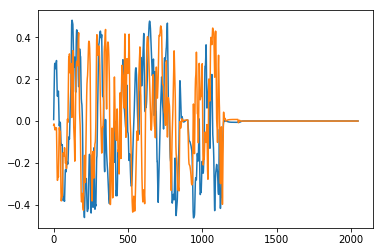

49


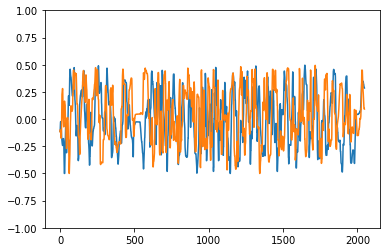

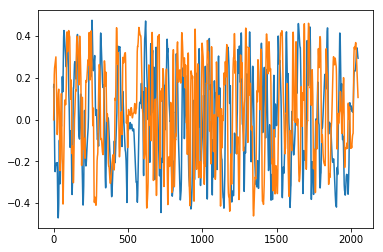

In [18]:
predicted_pos = model.predict(X)

#plot_info(y, predicted_pos)
    
for i in range(50):
    print(i)
    plot_info(y[i], predicted_pos[i])

C:\Program Files (x86)\Jogos\osu!\Songs\410162 Imperial Circus Dead Decadence - Uta\Imperial Circus Dead Decadence - Uta (Kite) [Himei].osu


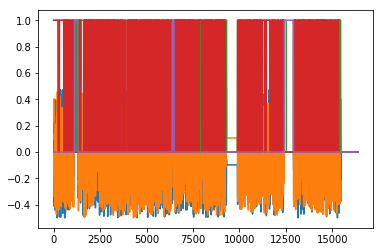

Done.


In [20]:
reload(osulearn)
reload(osulearn.dataset)

BEATMAPS_FOLDER = 'C:\\Program Files (x86)\\Jogos\\osu!\\Songs\\'
#BEATMAP = glob.glob(BEATMAPS_FOLDER + "\\**\\*Quantum Entanglement*.osu")[0]
#BEATMAP = glob(BEATMAPS_FOLDER + "\\**\\*My Love*Insane*.osu")[0]
BEATMAP = glob.glob(BEATMAPS_FOLDER + "\\**\\*Uta*Himei*.osu")[0]
#BEATMAP = glob.glob(BEATMAPS_FOLDER + "\\**\\*DAYBREAK*Horizon[]]*.osu")[0]
print(BEATMAP)
beatmap = osu.rulesets.beatmap.load(BEATMAP)

xx = osulearn.dataset.input_data(beatmap)
xx = np.reshape(xx.values, (-1, osulearn.dataset.CHUNK_LENGTH, len(osulearn.dataset.INPUT_FEATURES)))

plt.plot(np.concatenate(xx))
plt.show()

predicted = model.predict(xx)

np.save('osu/replay.npy', np.concatenate(predicted))
print("Done.")